# Differenced Target

This is to analyze the idea of using a differenced target in the predictions. 

In [2]:
import pandas as pd
from pmdarima import auto_arima
from typing import Dict, Tuple
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/tslearn/bases/bases.py:16: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [18]:
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(project_root)

# Now you can import from core if needed
from src.core.clients.bigquery import BigQueryClient

bq_client = BigQueryClient()

sales_query = """
    SELECT 
        tgt.ctx_date_month,
        tgt.ctx_cat_id, 
        tgt.ctx_dept_id, 
        tgt.ctx_item_id,
        tgt.tgt_monthly_sales,
        tgt.tgt_monthly_sales_sum_3_next_months,
    FROM `porygon-pipelines.walmart_targets_and_filters.target_store_item_monthly` tgt
    WHERE 
        tgt.ctx_store_id = 'CA_1'
"""

# Extract data
item_sales = bq_client.load_from_query(sales_query)

#item_sales = item_sales[item_sales["tgt_monthly_sales"]>0]
item_sales = item_sales[
    (item_sales["ctx_date_month"]>=pd.to_datetime("2011-02-01"))
    & (item_sales["ctx_date_month"]<=pd.to_datetime("2015-11-01"))
     ]

item_sales = item_sales[item_sales["tgt_monthly_sales"]>0]




INFO:src.core.clients.bigquery:BigQuery client initialized for project: porygon-pipelines
/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.core.clients.bigquery:Loaded 192087 rows from custom query.


# Create a Differenced Target

In [29]:
item_sales["ctx_date_month"] = pd.to_datetime(item_sales["ctx_date_month"])
item_sales["tgt_monthly_sales_sum_3_next_months_diff"] = item_sales.sort_values("ctx_date_month").groupby("ctx_item_id")["tgt_monthly_sales_sum_3_next_months"].diff()



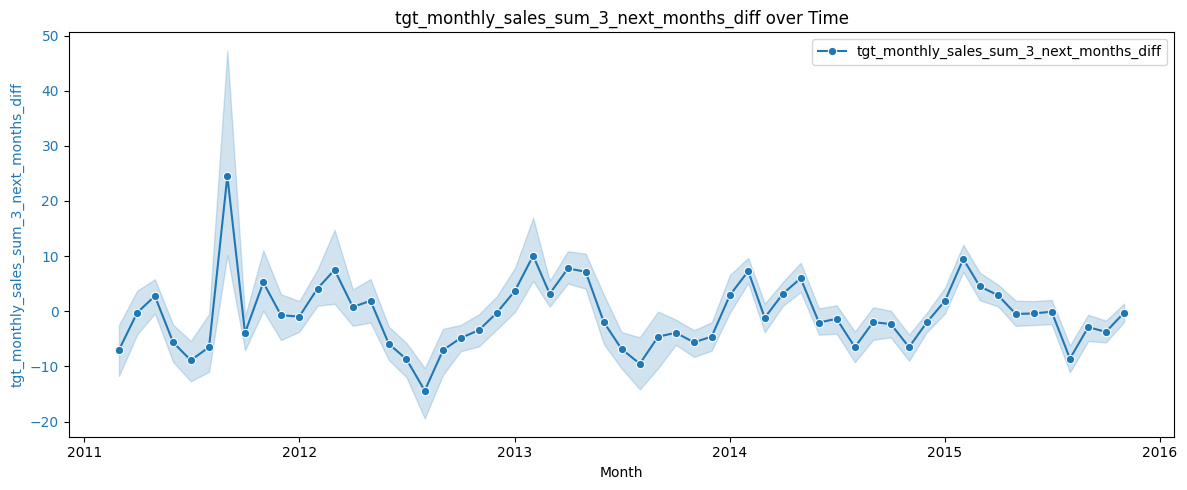

In [32]:
fig, ax1 = plt.subplots(figsize=(12,5))
sns.lineplot(data=item_sales, x='ctx_date_month', y='tgt_monthly_sales_sum_3_next_months_diff', marker='o', ax=ax1, color='tab:blue', label="tgt_monthly_sales_sum_3_next_months_diff")
ax1.set_ylabel('tgt_monthly_sales_sum_3_next_months_diff', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title(f'tgt_monthly_sales_sum_3_next_months_diff over Time')
ax1.set_xlabel('Month')
fig.tight_layout()
plt.show()

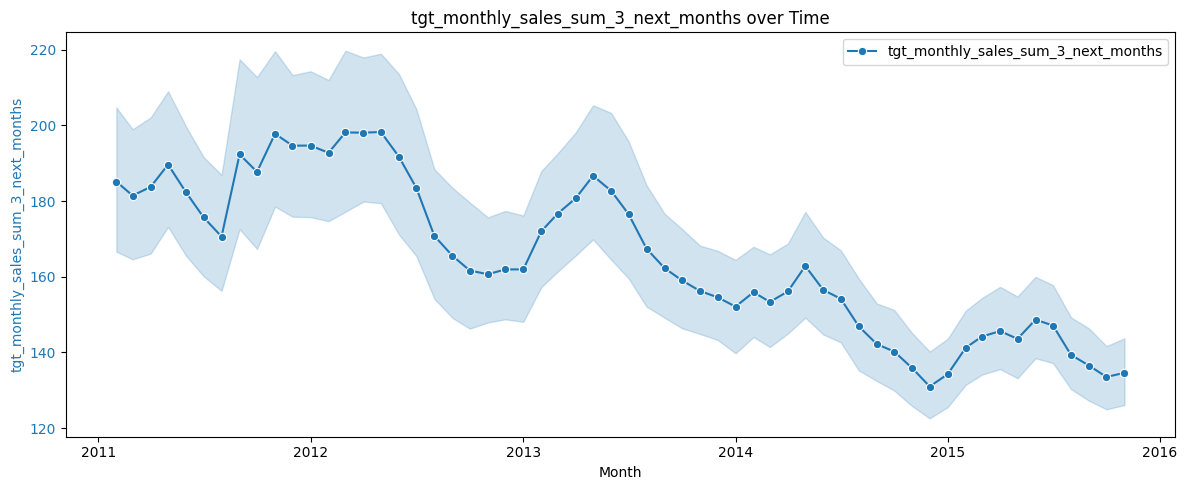

In [33]:
fig, ax1 = plt.subplots(figsize=(12,5))
sns.lineplot(data=item_sales, x='ctx_date_month', y='tgt_monthly_sales_sum_3_next_months', marker='o', ax=ax1, color='tab:blue', label="tgt_monthly_sales_sum_3_next_months")
ax1.set_ylabel('tgt_monthly_sales_sum_3_next_months', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title(f'tgt_monthly_sales_sum_3_next_months over Time')
ax1.set_xlabel('Month')
fig.tight_layout()
plt.show()